In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [63]:
df = pd.read_excel('NYC_TABLEU_DTd.xlsx')
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,time_of_day
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,Standard rate,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,Credit card,Street-hail,2.75,Malam
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,Standard rate,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,Credit card,Street-hail,0.00,Malam
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,Standard rate,223,179,1,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,Credit card,Street-hail,0.00,Malam
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,Standard rate,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,Credit card,Street-hail,0.00,Malam
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,Standard rate,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,Credit card,Street-hail,0.00,Malam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63872,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,Negotiated fare,130,205,1,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,Credit card,Dispatch,0.00,Malam
63873,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,Standard rate,65,181,1,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,Credit card,Street-hail,0.00,Malam
63874,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,Standard rate,244,116,1,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,Credit card,Street-hail,0.00,Malam
63875,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,Standard rate,74,238,1,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,Credit card,Street-hail,2.75,Malam


In [64]:
data = df[['lpep_pickup_datetime','total_amount']]

In [65]:
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])

In [68]:
data_2023 = data[(data['lpep_pickup_datetime'].dt.year ==2023) & (data['lpep_pickup_datetime'].dt.month ==1)]

In [69]:
data_2023

,lpep_pickup_datetime,total_amount
0,2023-01-01 00:26:10,24.18
1,2023-01-01 00:51:03,15.84
2,2023-01-01 00:35:12,11.64
3,2023-01-01 00:13:14,10.20
4,2023-01-01 00:33:04,8.00
...,...,...
63872,2023-01-31 23:09:22,17.30
63873,2023-01-31 23:06:18,19.20
63874,2023-01-31 23:17:03,14.16
63875,2023-01-31 23:29:18,22.50


<Axes: xlabel='total_amount', ylabel='Density'>

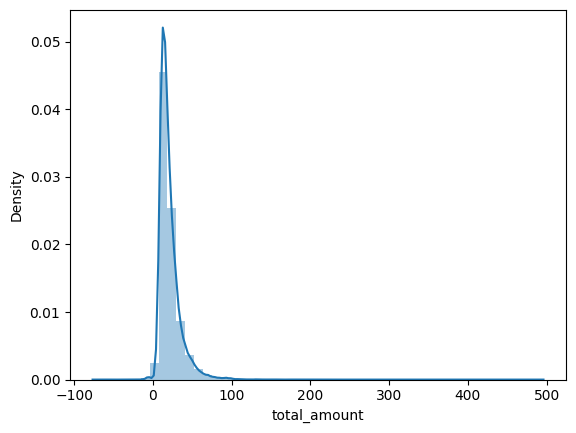

In [70]:
sns.distplot(data_2023['total_amount'])

In [71]:
data_2023['total_amount'].skew()

6.485988158886174

In [72]:
data_2023['lpep_pickup_datetime'] = pd.to_datetime(data_2023['lpep_pickup_datetime'].dt.date)

In [73]:
group_by = data_2023.groupby('lpep_pickup_datetime',as_index= False)['total_amount'].sum()

In [74]:
group_by

,lpep_pickup_datetime,total_amount
0,2023-01-01,29318.96
1,2023-01-02,30102.44
2,2023-01-03,40846.49
3,2023-01-04,45485.32
4,2023-01-05,48537.02
5,2023-01-06,49636.55
6,2023-01-07,42026.43
7,2023-01-08,31522.71
8,2023-01-09,44883.07
9,2023-01-10,43334.44


In [75]:
import plotly.graph_objects as go

In [78]:
fig = go.Figure([go.Scatter(name=True,x=group_by['lpep_pickup_datetime'],y=group_by['total_amount'])])
fig.update_xaxes(rangeslider_visible= True)
fig.show()

In [80]:
adf=adfuller(group_by['total_amount'])
adf

(-5.658561530607283,
 9.495670044983145e-07,
 2,
 28,
 {'1%': -3.6889256286443146,
  '5%': -2.9719894897959187,
  '10%': -2.6252957653061224},
 417.5087019711312)

In [81]:
adf
alpha = 0.05
if adf[1] <= alpha:
    print('Reject null hypothesis, The data is stationary')
else:
    print('Failed to reject null hypothesis, The data is not stationary')

Reject null hypothesis, The data is stationary


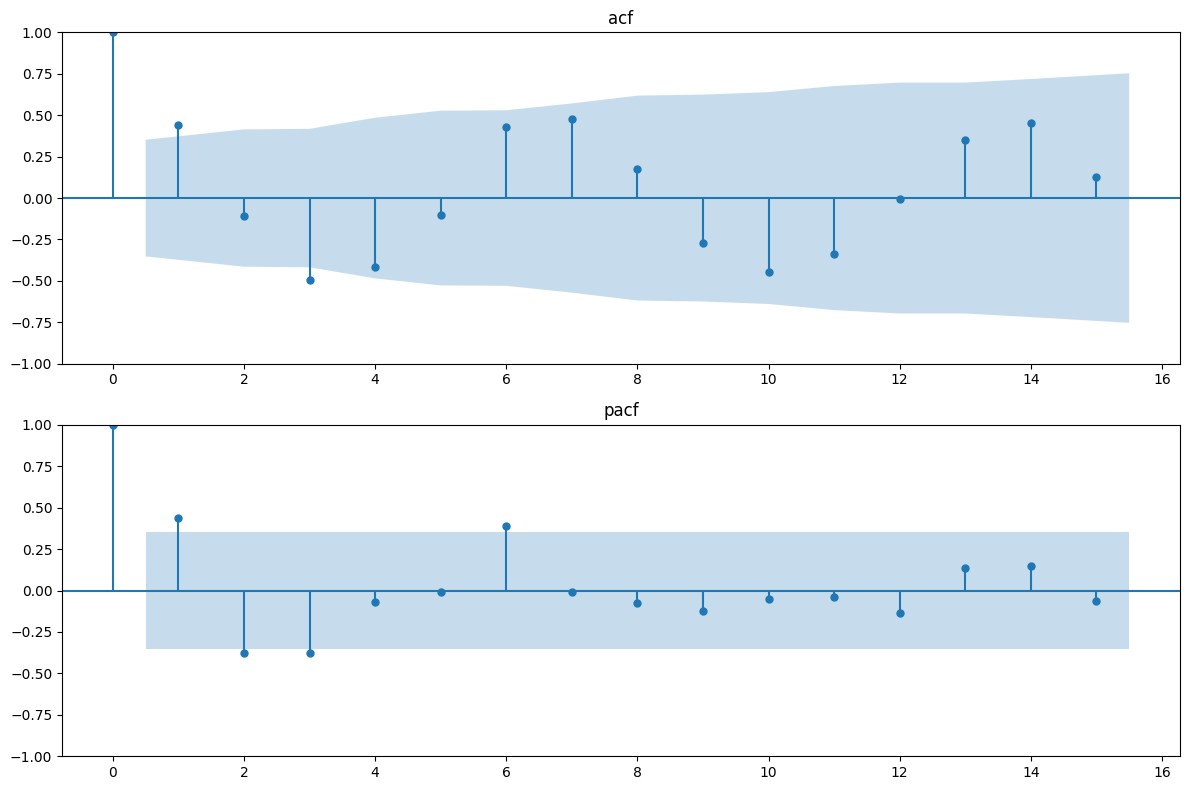

In [83]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig,axes = plt.subplots(2,1, figsize= (12,8))
plot_acf(group_by['total_amount'],ax=axes[0])
axes[0].set_title('acf')

plot_pacf(group_by['total_amount'],ax=axes[1])
axes[1].set_title('pacf')

plt.tight_layout()
plt.show()

In [84]:
import pmdarima as pmd
arima = pmd.auto_arima(
    group_by['total_amount'],
    start_p=1,
    start_q=1,
    trace=True,

)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=638.037, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=642.074, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=636.884, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=637.398, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=753.240, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=634.359, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=627.454, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=629.403, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=629.348, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=647.577, Time=0.11 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=631.403, Time=0.20 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=649.744, Time=0.04 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.987 seconds


In [89]:
from statsmodels.tsa.arima.model import ARIMA

In [90]:
model = ARIMA(group_by['total_amount'],order=(3,0,0))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           total_amount   No. Observations:                   31
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -308.885
Date:                Wed, 02 Apr 2025   AIC                            627.769
Time:                        22:43:31   BIC                            634.939
Sample:                             0   HQIC                           630.106
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.368e+04    884.890     49.364      0.000    4.19e+04    4.54e+04
ar.L1          0.4530      0.177      2.555      0.011       0.106       0.800
ar.L2         -0.0969      0.299     -0.324      0.7

In [91]:
model2 = ARIMA(group_by['total_amount'],order=(2,0,1))
model_fit2=model2.fit()
print(model_fit2.summary())

                               SARIMAX Results                                
Dep. Variable:           total_amount   No. Observations:                   31
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -310.528
Date:                Wed, 02 Apr 2025   AIC                            631.057
Time:                        22:45:21   BIC                            638.226
Sample:                             0   HQIC                           633.394
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.405e+04    864.496     50.958      0.000    4.24e+04    4.57e+04
ar.L1          1.0615      0.216      4.915      0.000       0.638       1.485
ar.L2         -0.6864      0.151     -4.554      0.0

In [95]:
group_by['forcaste'] = model_fit.fittedvalues

In [96]:
group_by['forcaste2'] = model_fit2.fittedvalues

In [97]:
fig = go.Figure()

fig.add_trace(go.Scatter(name='True', x= group_by.index, y= group_by['total_amount'],
                         mode= 'lines', line= dict(color='blue')))

fig.add_trace(go.Scatter(name='forcaste', x= group_by.index, y= group_by['forcaste'],
                         mode= 'lines', line= dict(color='red')))

fig.add_trace(go.Scatter(name='forcaste2', x= group_by.index, y= group_by['forcaste2'],
                         mode= 'lines', line= dict(color='green')))


# Tambahkan Range Slider
fig.update_xaxes(rangeslider_visible=True)

# Judul dan Label
fig.update_layout(title="Perbandingan Data Aktual vs ARIMA (0,0,2) dan ARIMA (0,0,1)",
                  xaxis_title="Tanggal",
                  yaxis_title="Jumlah Penumpang")

# Tampilkan Grafik
fig.show()

In [98]:
from sklearn.metrics import mean_squared_error
actual_values = group_by['total_amount']
from sklearn.metrics import mean_squared_error

# Lakukan prediksi dengan model ARIMA(0,0,2)
forecast_002 = model_fit.forecast(steps=len(actual_values))

# Hitung MSE
mse_002 = mean_squared_error(actual_values, forecast_002)

print("MSE ARIMA (0,0,2):", mse_002)

MSE ARIMA (0,0,2): 70423828.66177294


In [99]:
group_by

,lpep_pickup_datetime,total_amount,forcaste,forcaste2
0,2023-01-01,29318.96,43681.415557,44053.025849
1,2023-01-02,30102.44,36835.746234,37319.088197
2,2023-01-03,40846.49,40881.292411,42009.954990
3,2023-01-04,45485.32,51290.267818,50809.292725
4,2023-01-05,48537.02,51936.562164,50645.008032
5,2023-01-06,49636.55,47201.390393,48989.223509
6,2023-01-07,42026.43,44956.488224,46544.032515
7,2023-01-08,31522.71,39793.020715,40573.955473
8,2023-01-09,44883.07,35193.054831,37163.854145
9,2023-01-10,43334.44,46277.471560,49251.931798
